# Ensemble Methods and Random Forests

The idea behind ensemble methods is to combine the predictions of multiple models to get a better prediction.

There are two approaches to build ensemble methods:
* **averaging**: build several estimators independently (often training them only on a subset of samples and/or features) and then average their predictions (or use a majority-vote approach)
    * Bagging methods
    * Random forests
* **boosting**: combine many weak predictors to get a strong predictor. Train the models sequentially: the successor model will try to correct the wrong predictions of its predecessor.
    * AdaBoost
    * Gradient Boosting
    * XGBoost

## Setup

In [30]:
# Python ≥3.8 is required
import sys
assert sys.version_info >= (3, 8)

# Scikit-Learn ≥ 1.0 is required
import sklearn
assert sklearn.__version__ >= "1.0"

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Precision options
np.set_printoptions(precision=2)
pd.options.display.float_format = '{:.3f}'.format

### Bagging 

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

We'll train and test a bagging ensemble model based on 100 decision trees, using an artificially contructed dataset generated with the `sklearn.dataset.make_moons()` function.

This will generate a non-linearly separable binary 2D dataset (the two classes are marked 0 and 1). We will also add some gaussian noise to the distribution.

In [31]:
from sklearn.datasets import make_moons
X, y = make_moons(
    n_samples=500,
    noise=0.2 # standard deviation of Gaussian noise added to the data.
)

In [32]:
X[:, 0]

array([ 0.49,  0.  ,  1.17,  0.13, -0.7 ,  1.94, -0.25,  0.02, -0.31,
        1.01, -0.8 , -0.96,  0.75, -0.22, -0.71,  1.92,  1.28,  1.38,
        0.81,  0.35,  2.21,  0.39,  0.93, -0.9 ,  0.79, -0.06,  0.54,
        1.99,  0.14,  0.8 ,  0.75,  0.86,  0.57,  0.65,  0.06,  0.4 ,
       -1.32,  1.02,  0.88,  1.02,  1.4 ,  1.52,  0.48,  0.58, -0.73,
        0.32,  2.11,  0.9 ,  0.76,  0.72,  0.58,  1.7 ,  0.25,  1.6 ,
        0.42, -1.01,  1.25,  0.09, -0.29,  0.39, -0.09, -0.67,  2.02,
       -0.65,  0.66, -1.1 ,  0.28,  0.23, -0.72,  1.5 ,  1.79,  0.36,
       -0.6 ,  0.09, -0.51, -0.61,  0.86, -0.66,  0.91,  1.03,  1.82,
        0.57, -0.11,  0.9 ,  1.31,  1.74,  0.85,  0.9 ,  0.15,  0.18,
        1.52,  0.26, -0.85,  1.44,  0.74,  1.23,  0.7 ,  1.92,  1.19,
       -0.19, -0.54,  0.29,  0.57,  0.86,  1.57,  1.39,  0.75,  0.61,
        0.82,  2.24,  1.82,  0.98,  0.86,  0.46, -0.09, -0.37, -1.2 ,
       -0.22,  0.74, -0.21,  1.91,  1.41,  1.45, -1.26,  1.18,  0.3 ,
        0.25,  0.87,

In [33]:
y

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,

If we plot the dataset, we can see that it generates two interleaving half circles.

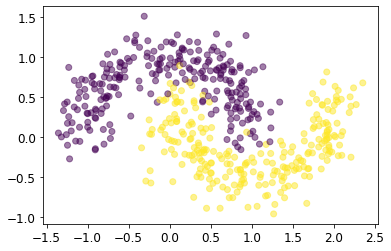

In [34]:
import matplotlib.pyplot as plt
_ = plt.scatter(
    X[:, 0], 
    X[:, 1], 
    c=y,
    alpha=0.5
)

Let's split the dataset into training and test set, and then train a `BaggingClassifier` using 100 Decision Trees.

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=77
)

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=100, # the namber of samples used to train each single classifier
    bootstrap=True, # sampling is performed with replacement
    n_jobs=-1 # number of estimators to run in parallel. If -1 use all processor
)

Let's train the model using 5-fold cross-validation. It is fair to use "accuracy" as a performance metric as our dataset is well balanced.

In [37]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(bag_clf, X_train, y_train, cv=5, scoring="accuracy")

In [38]:
import numpy as np
np.mean(scores)

0.96

That looks not bad at all.

## Random Forests

Random Forests are an ensemble of decision trees generally trained using the bagging method, typically with `max_samples` set to the size of the training set.

The `RandomForestClassifier` compared to the `BaggingClassifier` is optimized for decision trees. The Random Forest algorithm searches the best feature to split a node among a random subset of features rather than among all possible features. This extra randomness increases the resulting trees diversity, resulting into a higher bias and lower variance, and overall producing a more performant model.

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_leaf_nodes=16, 
    bootstrap=True, # sampling is performed with replacement
    n_jobs=-1 # number of estimators to run in parallel. If -1 use all processor
)
scores = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring="accuracy")

In [40]:
scores

array([0.96, 0.93, 0.95, 0.96, 0.96])

In [41]:
np.mean(scores)

0.9525

**Exercise:** evaluate the performance of the two approaches (`BaggingClassifier` and `RandomForestClassifier`) using different metrics, and argue which of the two yields the better result. You can also explore the hyperparameter space with grid or random search to find a good combination of hyperparameters.

In [47]:
# Write your solution here

from sklearn.datasets import make_moons
X, y = make_moons(
    n_samples=500,
    noise=0.2 # standard deviation of Gaussian noise added to the data.
)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=77
)


In [48]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

bagging_clf = BaggingClassifier(n_estimators=100, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

bagging_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

bagging_pred = bagging_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("BaggingClassifier:")
print("Accuracy:", accuracy_score(y_test, bagging_pred))
print("Precision:", precision_score(y_test, bagging_pred, average='weighted'))
print("Recall:", recall_score(y_test, bagging_pred, average='weighted'))
print("F1-score:", f1_score(y_test, bagging_pred, average='weighted'))

print("\nRandomForestClassifier:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred, average='weighted'))
print("Recall:", recall_score(y_test, rf_pred, average='weighted'))
print("F1-score:", f1_score(y_test, rf_pred, average='weighted'))


BaggingClassifier:
Accuracy: 0.97
Precision: 0.9703183133526251
Recall: 0.97
F1-score: 0.9700591347650172

RandomForestClassifier:
Accuracy: 0.99
Precision: 0.9902439024390245
Recall: 0.99
F1-score: 0.990019711588339


### Observation: 
The random forest classifier tends to be more accurate and robust than the bagging classifier, as it uses more sophisticated techniques such as feature bagging and random feature selection to reduce variance and overfitting.

# And for the IRIS data set ...

In [53]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)


In [54]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

bagging_clf = BaggingClassifier(n_estimators=100, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

bagging_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

bagging_pred = bagging_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("BaggingClassifier:")
print("Accuracy:", accuracy_score(y_test, bagging_pred))
print("Precision:", precision_score(y_test, bagging_pred, average='weighted'))
print("Recall:", recall_score(y_test, bagging_pred, average='weighted'))
print("F1-score:", f1_score(y_test, bagging_pred, average='weighted'))

print("\nRandomForestClassifier:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred, average='weighted'))
print("Recall:", recall_score(y_test, rf_pred, average='weighted'))
print("F1-score:", f1_score(y_test, rf_pred, average='weighted'))

BaggingClassifier:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

RandomForestClassifier:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


# <font color = "red">Apply GridSearchCV and check the Hyperparameters tuning - TO COMPLETE! Check Lecture notes...<font/>

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'n_estimators': [3, 10, 30], 
        'max_leaf_nodes': [2, 4, 6, 8]
    },
    {
        'bootstrap': [False], 
        'n_estimators': [3, 10], 
        'max_features': [2, 3, 4]
    },
]

forest_cl = RandomForestClassifer()
grid_search = GridSearchCV(
    forest_cl, param_grid, cv=5,
    scoring='neg_mean_squared_error', return_train_score=True
)